## Simulating Evolution through Python

To begin work on this project I first decided to build the algorithm for evolution that would simulate a process in which a single individual survived or died over x generations.
I wanted to satisfy certain conditions:

    1. initial population should be set to 1
    2. for each generation, each individual has a 50% chance to survive (doubling) or to die 
    3. if the species die out, I want to remove it from the total dataset when graphing
    
The population must have an initial start of 1 individual and I set an initial generation limit to 5 for testing purposes. For each individual in the population, it produces a random number either 0 or 1 to determine if died(O) or 1(if survived). I used the random package to generate the numbers and turned it into a list. The list was then changed so that all 0s would become -1s for easier addition. After adding all the values of the list, the population is added with the new sum, and the loop continues unless every individual dies out or 5 generations had passed. 

You can also change the generation number to any amount, or let it run infinite till the species die out.

In [42]:
import numpy as np
import random

species = []

def simulation(x):
    population = 1
    for x in range(5):
        if population > 0:
            list = [random.randint(0, 1) for _ in range(population)]
            list[:] = [-1 if x==0 else x for x in list]
            totalgain = sum(list)
            population = population + totalgain
            species.append(population)
            print(population)

simulation(1)
print(species)

2
2
2
4
6
[2, 2, 2, 4, 6]


In [ ]:
The code above also prints the lineage so you can see it run after each generation. 

After making the algorithm, I then wanted to graph my data. First I had to change the algorithm up a bit, adding the append functions and making it so that if the population reaches 0 during any generation, it does not get added to the evolution dataset. 

In [251]:
species = []
evolution = []

def simulation(x):
    Totalpop = 0
    population = 1
    for x in range(5):
        if population > 0:
            list = [random.randint(0, 1) for _ in range(population)]
            list[:] = [-1 if x==0 else x for x in list]
            totalgain = sum(list)
            population = population + totalgain
            species.append(population)
    if population > 0:
        evolution.append(population)
        Totalpop = Totalpop + 1

After I was satisfied with the simulation, I then ran the function 200 times with 5 generations for each population and first plotted the total number of survived populations as a length of the list evolution. 

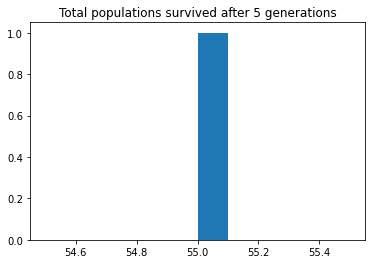

In [253]:
import matplotlib.pyplot

evolution = []

for x in range(200):
    simulation(1)
    
matplotlib.pyplot.hist(len(evolution))
matplotlib.pyplot.title('Total populations survived after 5 generations')
matplotlib.pyplot.show()

What I noticed from this plot is that at 5 generations, around 1/4 of the population survived. 
    
So for a range of 200, it's almost always that around ~50 populations survive and so on. 

Survival rate at 5 generations = Total Number of Populations / 4.

Then I plotted the second graph with the number of individuals survived for each surviving population in a histogram again at 5 generations. 

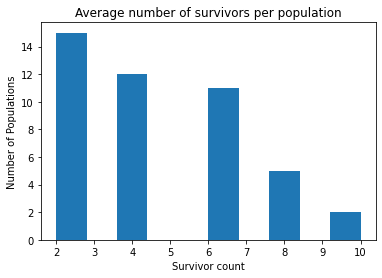

The mean is: 
4.533333333333333
The median is: 
4
The st.dev is: 
2.3510152545810348


In [254]:
evolution = []

import pandas as pd
import statistics
import matplotlib.pyplot

for x in range(200):
    simulation(1)


matplotlib.pyplot.hist(evolution)
matplotlib.pyplot.title('Average number of survivors per population')
matplotlib.pyplot.xlabel('Survivor count')
matplotlib.pyplot.ylabel('Number of Populations')
matplotlib.pyplot.show()


print('The mean is: ')
print(statistics.mean(evolution))
print('The median is: ')
print(statistics.median(evolution))

I added some descriptive statistics of the simulations and discovered a few insights. First the mean number of survivors per population (assuming 5 generations) varies but is often around ~4. The median is a constant 4. The graph usually follows a regular right skewed curve which is to be expected as most of the populations do not reach past 2-4 survivors after 5 generations. 

Lastly, I wanted to figure out the average total number of survivors of 200 simulations to see if it there are any consistencies in the amount survived. 

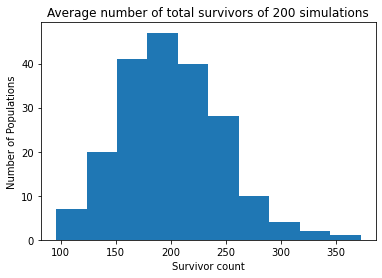

The mean is: 
200.39
The median is: 
198.0
The st.dev is: 
47.07726889095368


In [261]:
totalsurvivors = []

for x in range(200):
    evolution = []
    for x in range(200):
        simulation(1)
        survivors = sum(evolution)
    totalsurvivors.append(survivors)

matplotlib.pyplot.hist(totalsurvivors)
matplotlib.pyplot.title('Average number of total survivors of 200 simulations')
matplotlib.pyplot.xlabel('Survivor count')
matplotlib.pyplot.ylabel('Number of Populations')
matplotlib.pyplot.show()

print('The mean is: ')
print(statistics.mean(totalsurvivors))
print('The median is: ')
print(statistics.median(totalsurvivors))
print('The st.dev is: ')
print(statistics.stdev(totalsurvivors))

This graph was actually quite interesting as it almost follows a binomial distribution with the peak at 200 survivors after 200 simulations. The mean and median is also around ~200. This actually makes quite a lot of sense as:

1. Survival rate at 5 generations = Total Number of Populations / 4.
2. For 200 generations we should see a survival rate of 50 populations. 
3. From the earlier histogram a mean number of 4 individuals survived per population, thus, we should expect to see 50(populations) * 4(individuals) which is ~200 total survivors. 

So the last question I wanted to determine is whether or not this only works for 5 generations or if lowering and upping the generation count would change these distributions. 

To do so, I rewrote the algorithm a bit to allow a user to input any number of generations before printing out the same statistics as before. Running the code below will first ask for an input for amount of generations before printing out the lineage. 

In [54]:
species = []
evolution = []

def simulation(x):
    Totalpop = 0
    population = 1
    for x in range(int(input())):
        if population > 0:
            list = [random.randint(0, 1) for _ in range(population)]
            list[:] = [-1 if x==0 else x for x in list]
            totalgain = sum(list)
            population = population + totalgain
            species.append(population)
    if population > 0:
        evolution.append(population)
        Totalpop = Totalpop + 1
        
simulation(1)
print(species)
print(evolution)

 12


[2, 4, 8, 8, 8, 6, 6, 2, 4, 2, 2, 4]
[4]


Then, all thats left to do is graph it again, trying different generations each time to see if there can be a formula that can be applied to all numbers of generations. I had to manually change the generation count each time as otherwise input would cause the user to input a generation number x times for each population we ran (in this case hundreds). 

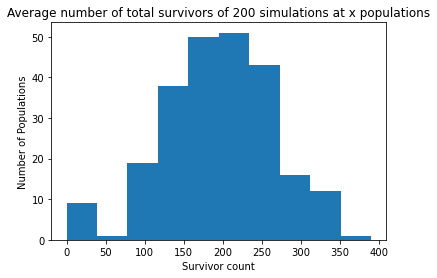

The mean is: 
194.00833333333333
The median is: 
198.0
The st.dev is: 
71.30428588447624


In [258]:
species = []
evolution = []

def simulation(x):
    Totalpop = 0
    population = 1
    for x in range(10):
        if population > 0:
            list = [random.randint(0, 1) for _ in range(population)]
            list[:] = [-1 if x==0 else x for x in list]
            totalgain = sum(list)
            population = population + totalgain
            species.append(population)
    if population > 0:
        evolution.append(population)
        Totalpop = Totalpop + 1
        

for x in range(10):
    evolution = []
    for x in range(200):
        simulation(1)
        survivors = sum(evolution)
    totalsurvivors.append(survivors)

matplotlib.pyplot.hist(totalsurvivors)
matplotlib.pyplot.title('Average number of total survivors of 200 simulations at x populations')
matplotlib.pyplot.xlabel('Survivor count')
matplotlib.pyplot.ylabel('Number of Populations')
matplotlib.pyplot.show()

print('The mean is: ')
print(statistics.mean(totalsurvivors))
print('The median is: ')
print(statistics.median(totalsurvivors))
print('The st.dev is: ')
print(statistics.stdev(totalsurvivors))

What is quite surprising is that no matter what the generation count is set to, it will always have a mean number of survivors equal to the amount of populations. This had me confused a little because the survival rate at 5 generations should not be the same survival rate at 10, 20, or x generations. 

So to figure out what is going on, I created one final algorithm which by manually changing the generation amount, you can see both the survival rate and average number of individuals survived. 

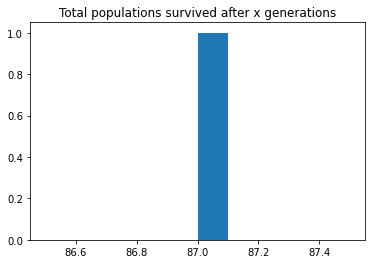

The survival rate for x generations is: 
2.2988505747126435


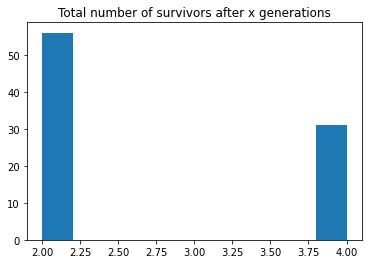

The mean total number of survivors is: 
2.7126436781609193
The median total number of survivors is: 
2


In [279]:
species = []
evolution = []

def simulation(x):
    Totalpop = 0
    population = 1
    for x in range(2):
        if population > 0:
            list = [random.randint(0, 1) for _ in range(population)]
            list[:] = [-1 if x==0 else x for x in list]
            totalgain = sum(list)
            population = population + totalgain
            species.append(population)
    if population > 0:
        evolution.append(population)
        Totalpop = Totalpop + 1
        
import matplotlib.pyplot

evolution = []

for x in range(200):
    simulation(1)
    
matplotlib.pyplot.hist(len(evolution))
matplotlib.pyplot.title('Total populations survived after x generations')
matplotlib.pyplot.show()
print('The survival rate for x generations is: ')
print(200 / len(evolution))

matplotlib.pyplot.hist(evolution)
matplotlib.pyplot.title('Total number of survivors after x generations')
matplotlib.pyplot.show()

print('The mean total number of survivors is: ')
print(statistics.mean(evolution))
print('The median total number of survivors is: ')
print(statistics.median(evolution))

Finally through this algorithm, I could see why the total number of surviving individuals is always equal to the amount of populations we started with. 

The survival rate and number of survivors have an inverse relationship. As the survival rate increases, the number of survivors decrease. We can actually test this by changing the amount of generations in the previous code and examining the survival rate and number of survivors. For example, with 2 generations we get: 

1. Average survival rate at 2 generations = Total number of populations / 2.5
2. At 2 generations, the mean individuals survived is 2.5
3. So when we do survival rate * mean number of individuals for 2 generations we see:
    
    200 / 2.5 (2.5) = 200
    
The same follows for any x number of generations, the survival rate and mean number of individuals survived are equal to each other. Thus for any amount of generations, the total number of survivors is simply equal to the number of populations we initially started with. So for 300 populations, we should expect 300 survivors and etc. 

So our final formula is:
    Total number of survived individuals = Total amount of populations we started with 
    
Final notes: I had a lot of fun with this project and I know some of my code can be optimized and or cleaned to display everything better. Please let me know if there are any wrong statements I have made from my analysis and any comments you may have. 

In [280]:
pwd

'C:\\Users\\jason'